In [14]:
---
  title: PA 8.1
  author: Owen Barberie
  format: 
      html:
          toc: false
          code-fold: false
          embed-resources: true
  theme: cosmo
  ---

SyntaxError: invalid syntax (2113416147.py, line 1)

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotnine import *

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
df.dropna(inplace=True)

X = df.drop(columns=['bill_depth_mm'])
y = df['bill_depth_mm']

# Dummying
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

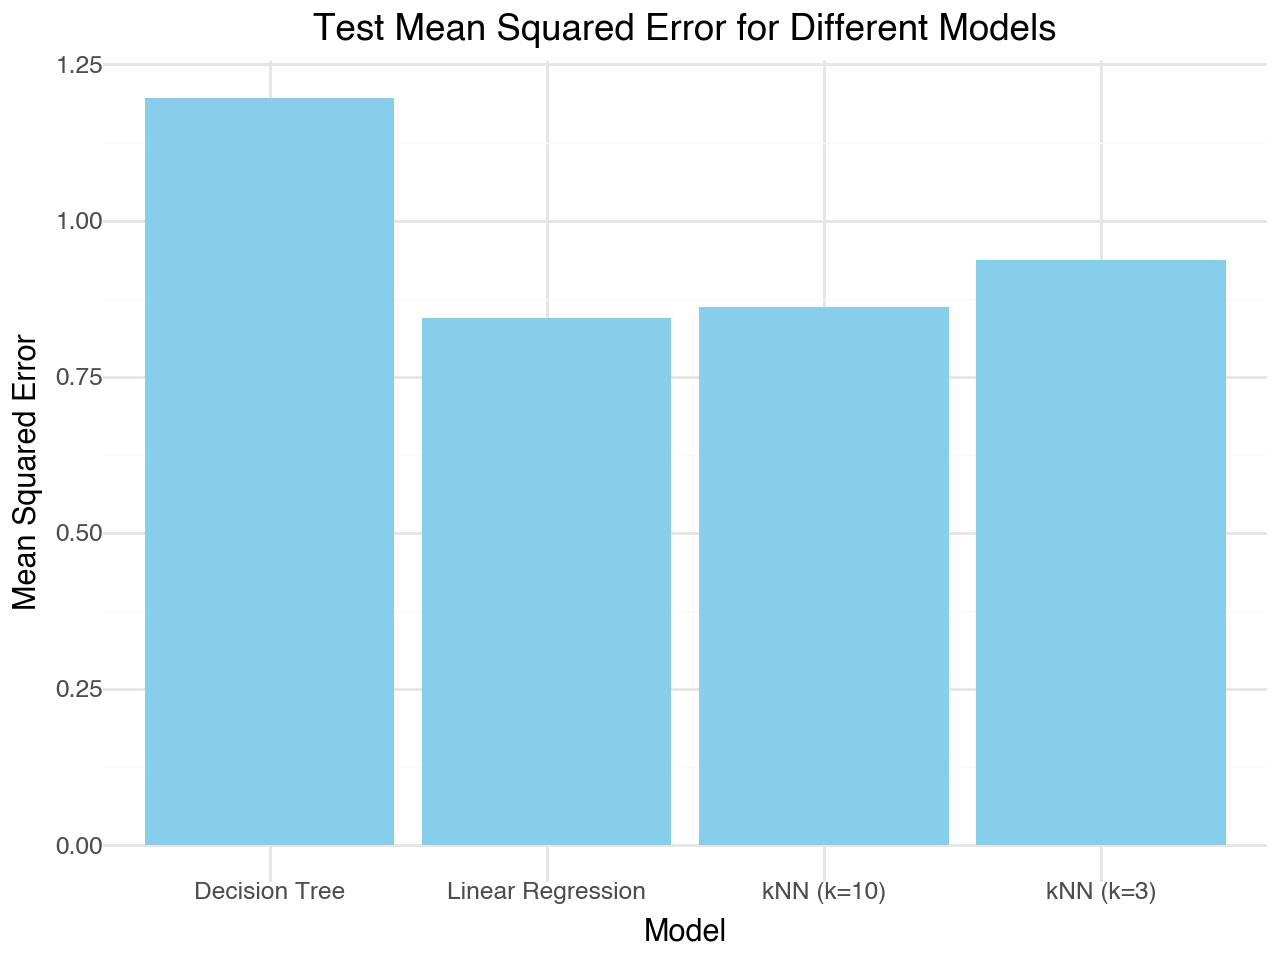

In [11]:
# T T S 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multiple linear regression pipeline
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# fit / predict
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)

# KNN Ks
knn_results = []
for k in [3, 10]:
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor(n_neighbors=k))
    ])
    
    # fit / predict using kNN
    knn_pipeline.fit(X_train, y_train)
    y_pred_knn = knn_pipeline.predict(X_test)
    knn_mse = mean_squared_error(y_test, y_pred_knn)
    knn_results.append((k, knn_mse))

# decision tree (dt) pipe
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# fit / predict dt 
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)

# plot 
models = ['Linear Regression', 'kNN (k=3)', 'kNN (k=10)', 'Decision Tree']
errors = [linear_mse, knn_results[0][1], knn_results[1][1], dt_mse]

error_df = pd.DataFrame({'Model': models, 'Mean Squared Error': errors})

(ggplot(error_df, aes(x='Model', y='Mean Squared Error')) +
        geom_bar(stat='identity', fill='skyblue') +
        labs(title='Test Mean Squared Error for Different Models', x='Model', y='Mean Squared Error') +
        theme_minimal())


In [13]:
# results
print("Linear Regression MSE:", linear_mse)
for k, mse in knn_results:
    print(f"kNN (k={k}) MSE:", mse)
print("Decision Tree MSE:", dt_mse)

Linear Regression MSE: 0.8436780763108651
kNN (k=3) MSE: 0.9361691542288555
kNN (k=10) MSE: 0.8608820895522385
Decision Tree MSE: 1.1964179104477615
Linear Regression MSE: 0.8436780763108651
kNN (k=3) MSE: 0.9361691542288555
kNN (k=10) MSE: 0.8608820895522385
Decision Tree MSE: 1.1964179104477615
